In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)

In [2]:
AA="C:/Users/ganes/oneDrive/Desktop/AI/FD/FDFDF.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(1544, 23)

In [3]:
A=df['Al2O3/Si']
B=df["B2O3/Si"]
C = df['BeO/Si']
D = df['Ga2O3/Si']
E = df["GeO2/Si"]
F=df['Li2O/Si']
G=df["K2O/Si"]
H = df['Na2O/Si']
I = df['Rb2O/Si']
J=df['Cs2O/Si']
K=df["SrO/Si"]
L = df['H2O/Si']
M=df['F/Si']
N= df['OSDA-1/Si']
O= df['OSDA-2/Si']
P=df["OH/Si"]
Q=df["Area-1"]
R=df["Area-2"]
S=df["T"]
T=df["t"]
U=df["rpm"]
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape




(1544, 21)

In [4]:
X_OS=List1
Y_OS=df["FDC"]

train accuracy 0.9993523108079412
test accuracy 0.9928697109342272
train precision 0.9968856787702112
test precision 0.9821170166446611
train recall 0.9988483586802153
test recall 0.9710224522256288
train f1 0.9978584049258519
test f1 0.9758562049438957
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      0.99      1.00       114

    accuracy                           1.00      1390
   macro avg       1.00      1.00      1.00      1390
weighted avg       1.00      1.00      1.00      1390

test               precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.92      0.92      0.92        13

    accuracy                           0.99       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.99      0.99      0.99       154

Matthews correlation coefficient Train 0.9957269611681114
Matthews correlation co

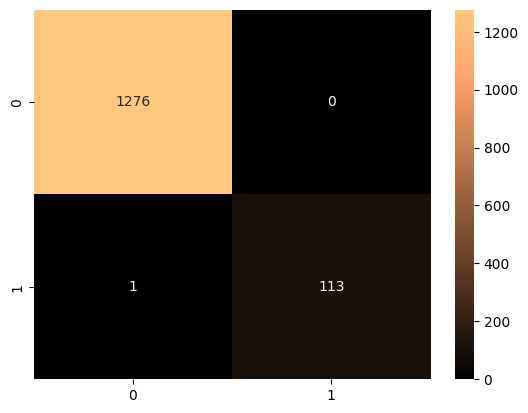

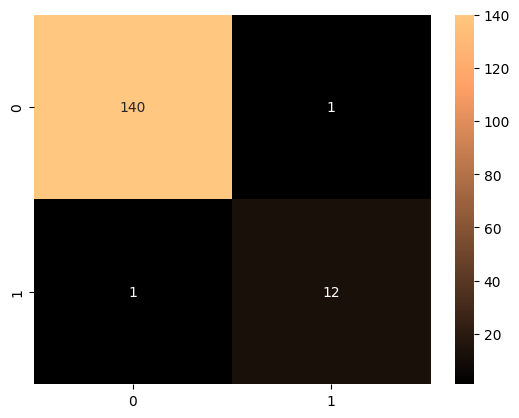

In [5]:
score_trainacc, score_testacc, score_trainpre, score_testpre,score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_RFtrain=list()
mmc_RFtest=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1, n_estimators=240)
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    mmctrain= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmctest= metrics.matthews_corrcoef(Y_Test, predict_RFTest)
    mmc_RFtrain.append(mmctrain)
    mmc_RFtest.append(mmctest)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient Train',mean(mmc_RFtrain))
print('Matthews correlation coefficient Test',mean(mmc_RFtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()

train accuracy 0.9781231256895133
test accuracy 0.9682614160033515
train precision 0.9353372499381084
test precision 0.9082977757336319
train recall 0.9191392138155521
test recall 0.8788352043521357
train f1 0.925896778433972
test f1 0.890399008021553
train               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1276
           1       0.90      0.83      0.87       114

    accuracy                           0.98      1390
   macro avg       0.94      0.91      0.93      1390
weighted avg       0.98      0.98      0.98      1390

test               precision    recall  f1-score   support

           0       0.97      0.98      0.98       141
           1       0.75      0.69      0.72        13

    accuracy                           0.95       154
   macro avg       0.86      0.84      0.85       154
weighted avg       0.95      0.95      0.95       154

Matthews correlation coefficient Train 0.853371831873764
Matthews correlation coeff

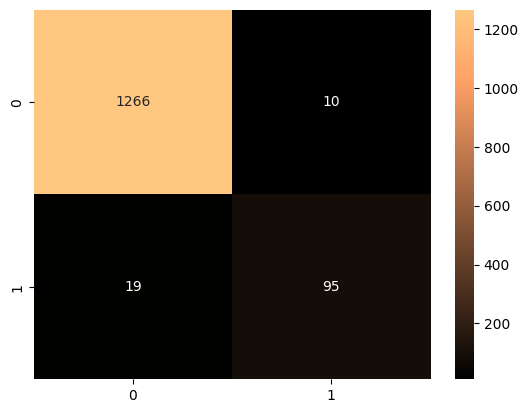

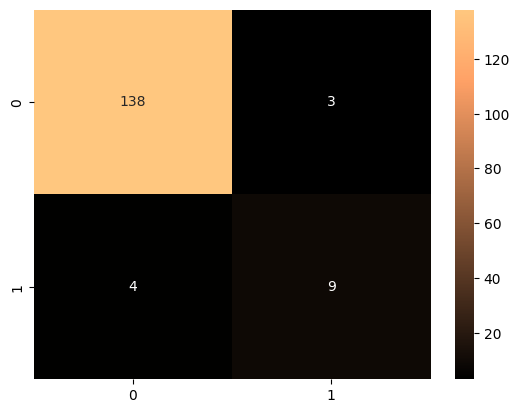

In [6]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dttrain=list()
mmc_dttest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1, criterion="entropy", splitter="random", min_samples_leaf=6)
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dttrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_dttest)
    mmc_dttest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient Train',mean(mmc_dttrain))
print('Matthews correlation coefficient Test',mean(mmc_dttest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


In [7]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from io import StringIO

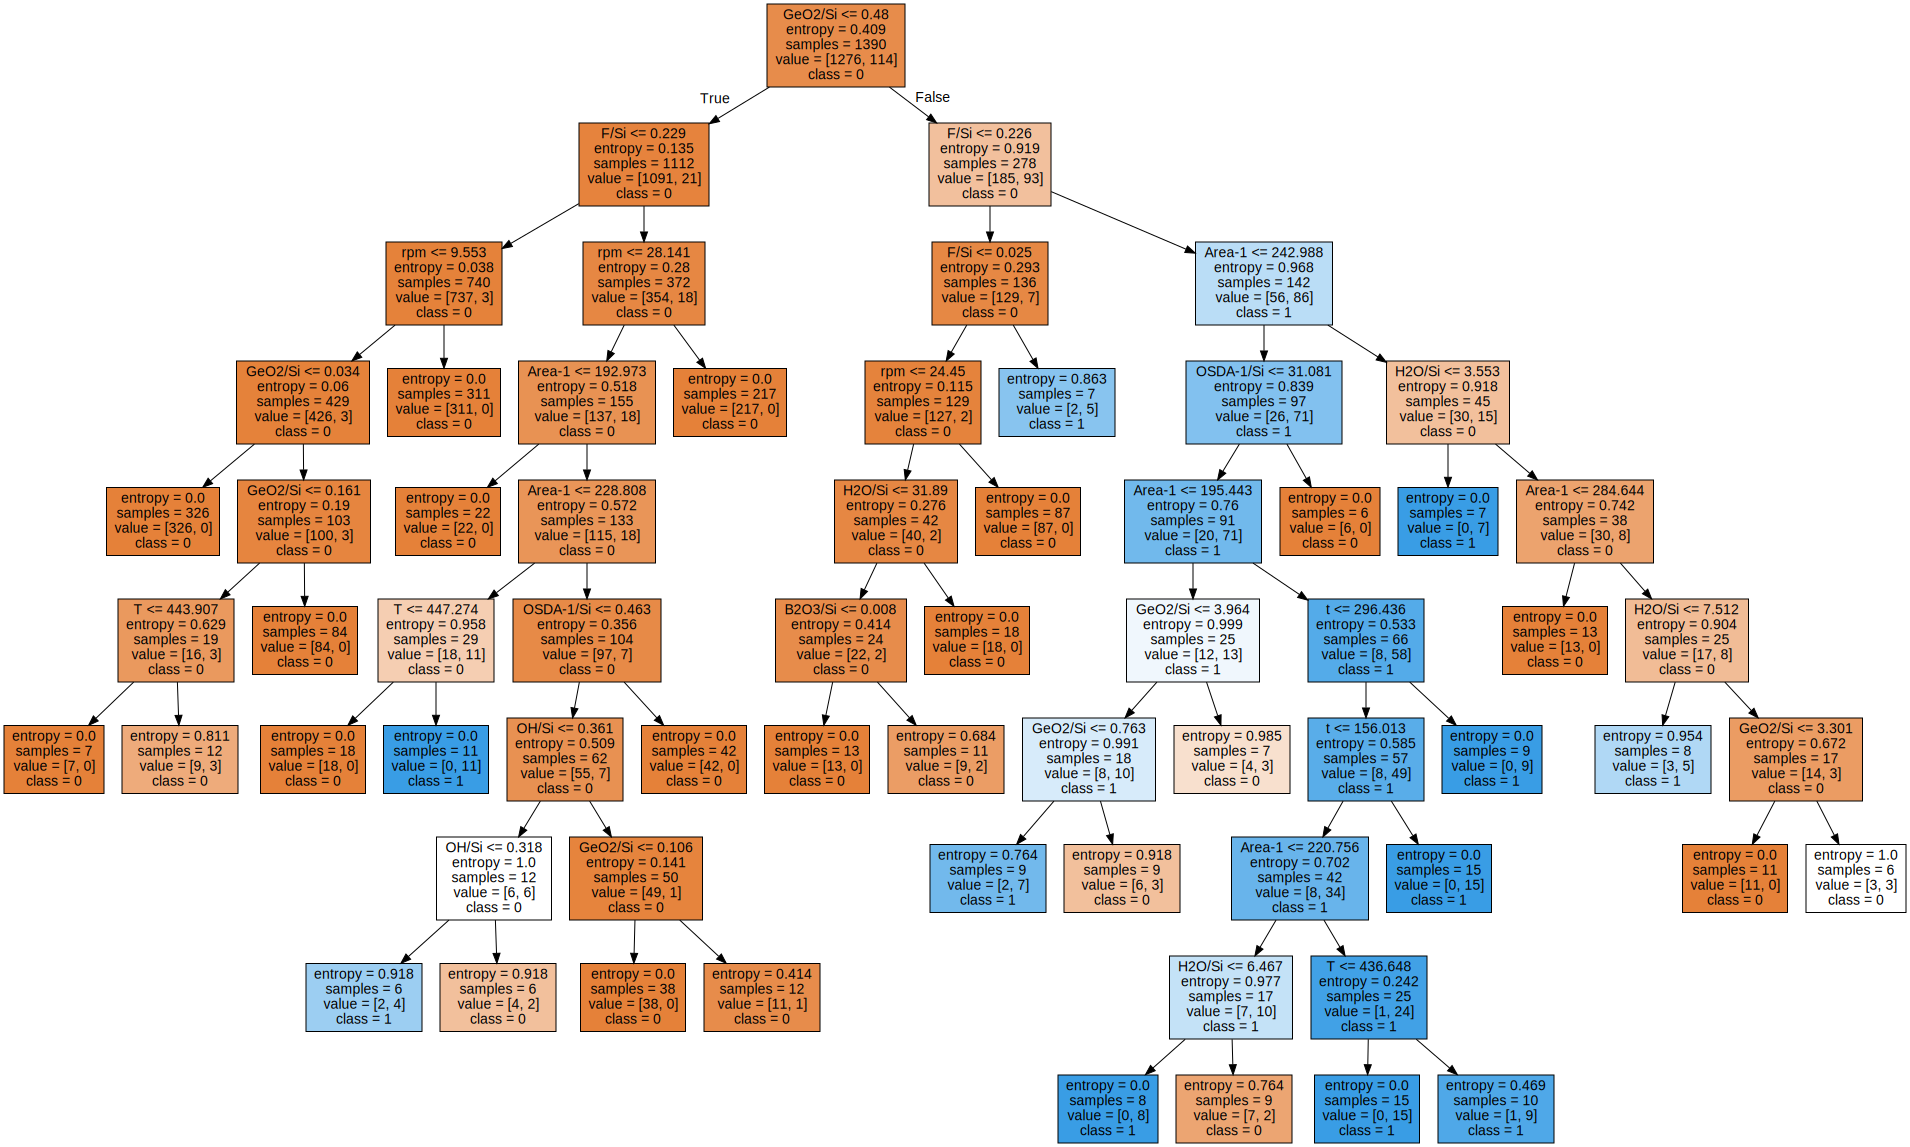

In [8]:
fn=["Al2O3/Si", 'B2O3/Si', 'BeO/Si', 'Ga2O3/Si', 'GeO2/Si', 'Li2O/Si', "K2O/Si", "Na2O/Si",
           "Rb2O/Si", "Cs2O/Si", "SrO/Si", "H2O/Si", "F/Si", "OSDA-1/Si", "OSDA-2/Si", "OH/Si",
           "Area-1", "Area-2", "T", "t", "rpm"]
cn=["0", "1"]
dot_data = tree.export_graphviz(DT,  feature_names = fn, class_names=cn,  filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph 

In [9]:
graph.render("FD Zeolite")

'FD Zeolite.png'

train accuracy 0.9993523108079412
test accuracy 0.9896313364055299
train precision 0.9968856787702112
test precision 0.9684655606971699
train recall 0.9988483586802153
test recall 0.966083365989719
train f1 0.9978584049258519
test f1 0.9659847247522485
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      0.99      1.00       114

    accuracy                           1.00      1390
   macro avg       1.00      1.00      1.00      1390
weighted avg       1.00      1.00      1.00      1390

test               precision    recall  f1-score   support

           0       0.99      0.98      0.99       141
           1       0.80      0.92      0.86        13

    accuracy                           0.97       154
   macro avg       0.90      0.95      0.92       154
weighted avg       0.98      0.97      0.97       154

Matthews correlation coefficient Train 0.9957269611681114
Matthews correlation coe

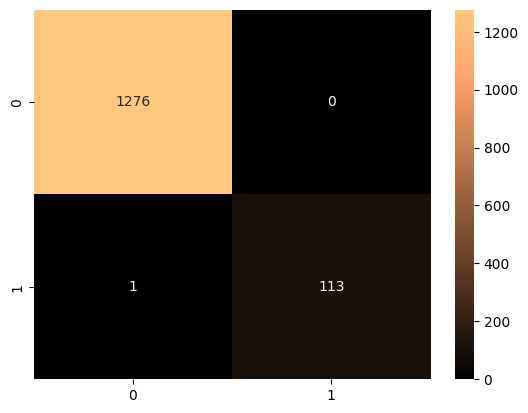

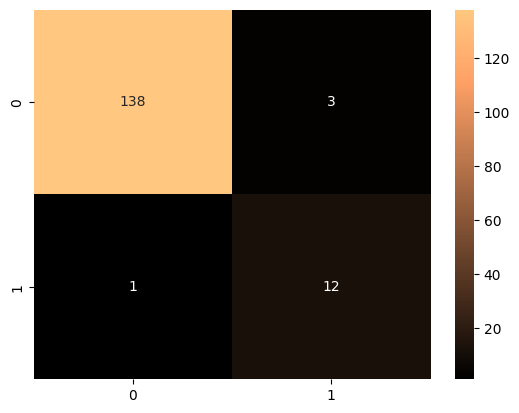

In [10]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gbtrain=list()
mmc_gbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1, n_estimators=1000, max_depth=5)
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_gbtest)
    mmc_gbtrain.append(mmc_train)
    mmc_gbtest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient Train',mean(mmc_gbtrain))
print('Matthews correlation coefficient Test',mean(mmc_gbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



 98%|===================| 1358/1390 [00:46<00:01]        

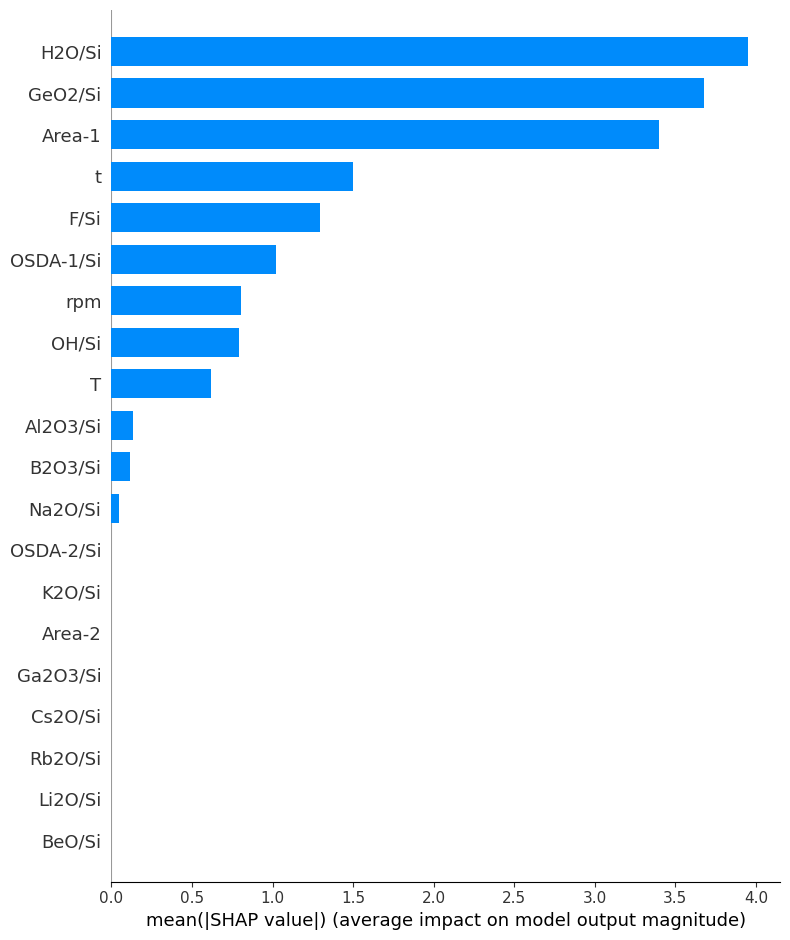

In [11]:
import shap
explainer_gb = shap.TreeExplainer(GB, X_Train)
shap_values_GB = explainer_gb.shap_values(X_Train)
shap.summary_plot(shap_values_GB, X_Train, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


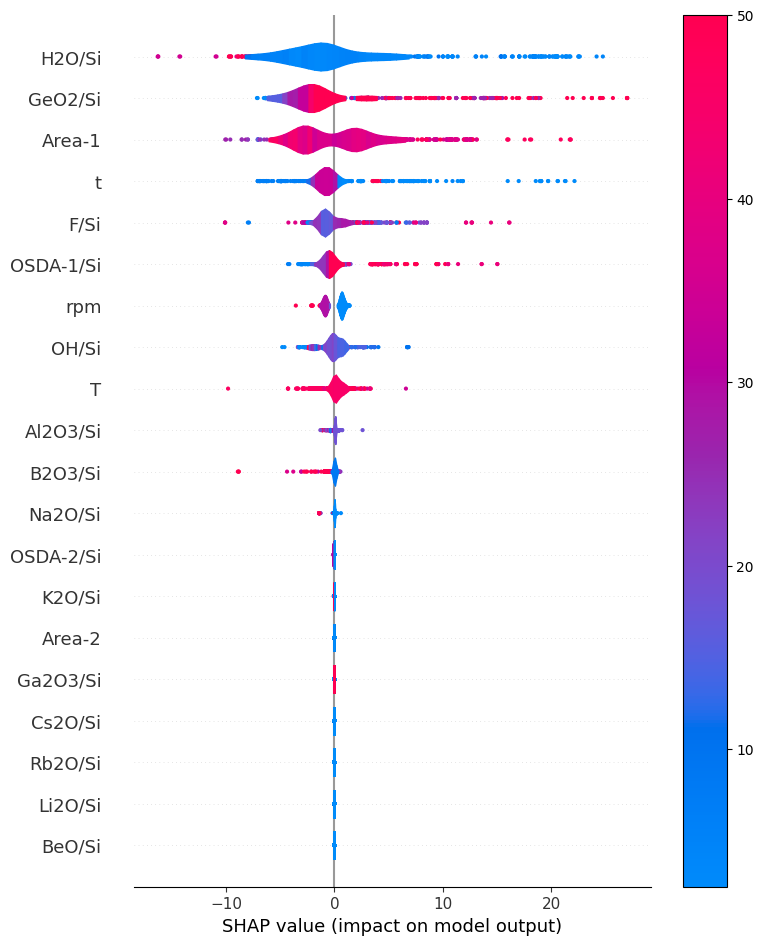

In [12]:
shap.summary_plot(shap_values_GB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

train accuracy 0.9909325066944283
test accuracy 0.9779723502304147
train precision 0.9701556361064615
test precision 0.9350695399251456
train recall 0.9699593466705995
test recall 0.9235128858255919
train f1 0.9699866702989153
test f1 0.9263304919529523
train               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1276
           1       0.96      0.94      0.95       114

    accuracy                           0.99      1390
   macro avg       0.98      0.97      0.97      1390
weighted avg       0.99      0.99      0.99      1390

test               precision    recall  f1-score   support

           0       0.99      0.96      0.97       141
           1       0.69      0.85      0.76        13

    accuracy                           0.95       154
   macro avg       0.84      0.91      0.87       154
weighted avg       0.96      0.95      0.96       154

Matthews correlation coefficient Train 0.9400569252082981
Matthews correlation co

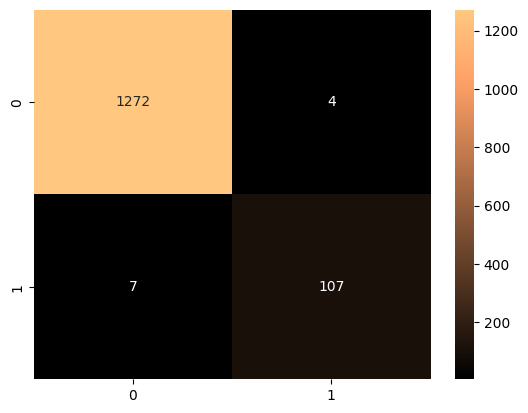

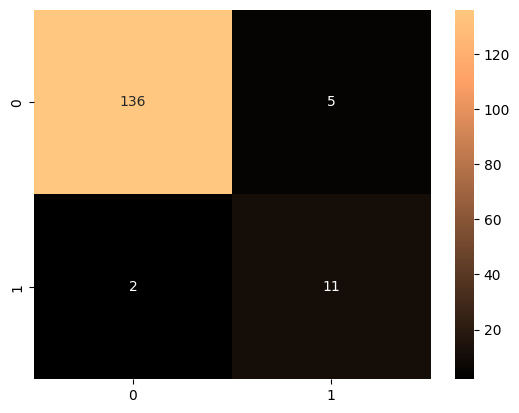

In [13]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgbtrain=list()
mmc_xgbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=1,learning_rate=0.009, )
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_xgbtest)
    mmc_xgbtrain.append(mmc_train)
    mmc_xgbtest.append(mmc_test)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient Train',mean(mmc_xgbtrain))
print('Matthews correlation coefficient Test',mean(mmc_xgbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


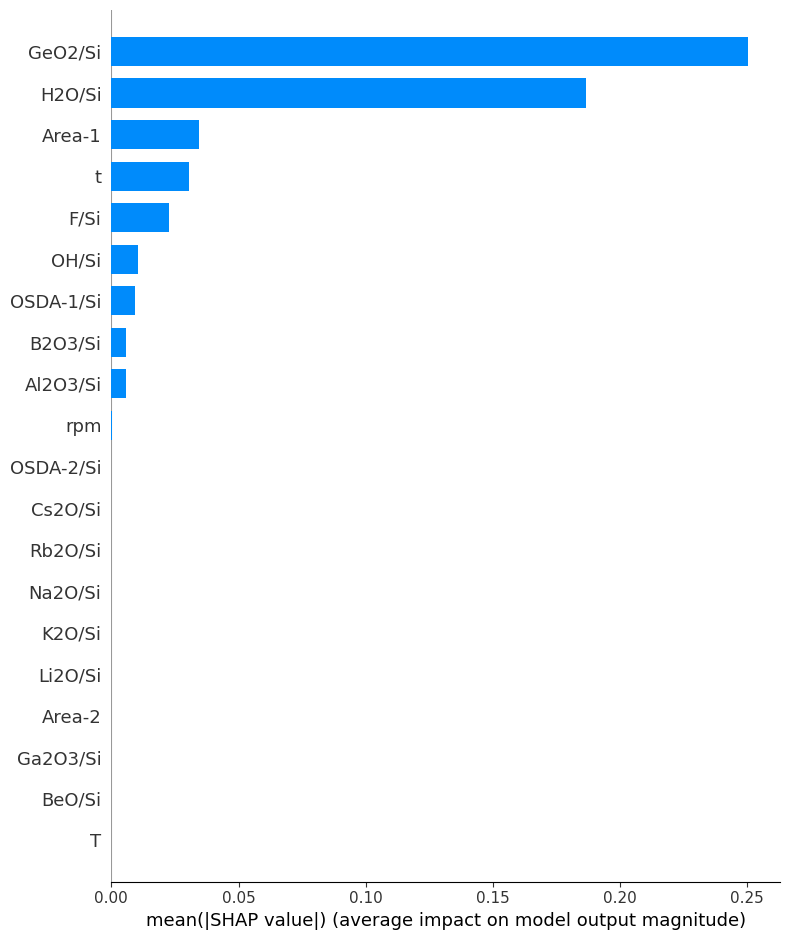

In [14]:
import shap
explainer = shap.TreeExplainer(XGB, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


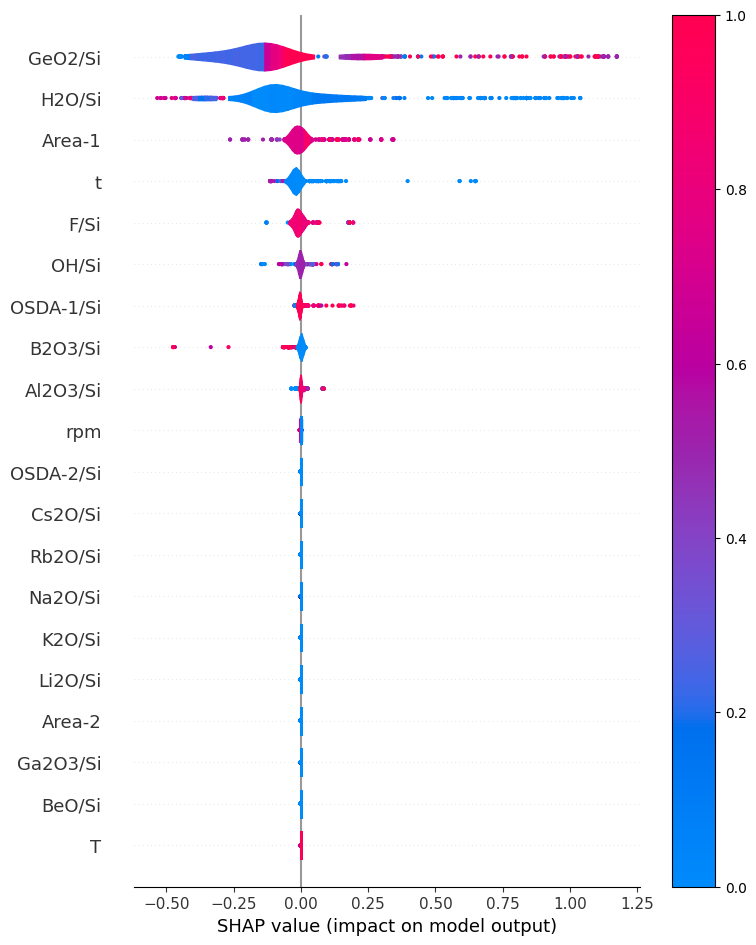

In [15]:
shap.summary_plot(shap_values_XGB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predicti

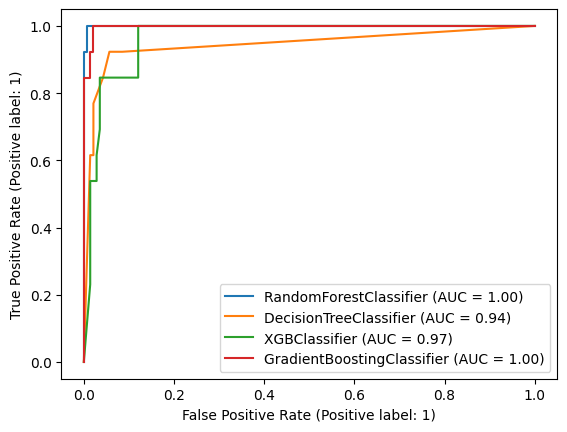

In [17]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_roc_curve(RF,X_Test,Y_Test)
ax=plt.gca()
dt_disp=plot_roc_curve(DT,X_Test,Y_Test, ax=ax)
xgb_disp=plot_roc_curve(XGB,X_Test,Y_Test, ax=ax)
gb_disp=plot_roc_curve(GB,X_Test,Y_Test, ax=ax)

plt.show()

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_est

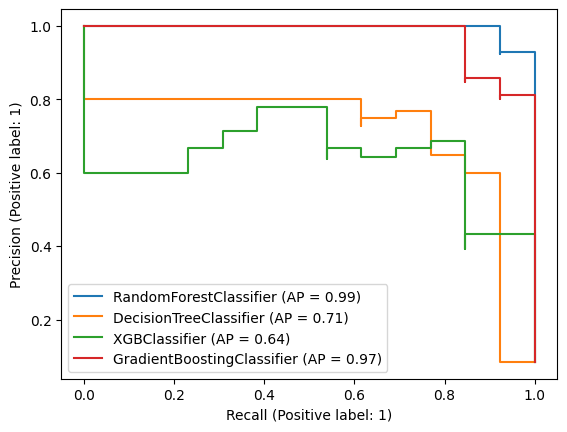

In [18]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_precision_recall_curve(RF,X_Test,Y_Test)
ax=plt.gca()
dt_disp=plot_precision_recall_curve(DT, X_Test,Y_Test, ax=ax)
xgb_disp=plot_precision_recall_curve(XGB, X_Test,Y_Test, ax=ax)
gb_disp=plot_precision_recall_curve(GB, X_Test,Y_Test, ax=ax)
plt.show()